In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
job_title = 'Data Analyst'
job_country = 'United States'

df_Jobs = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()
df_Jobs.dropna(subset='salary_year_avg', inplace=True)

<Axes: >

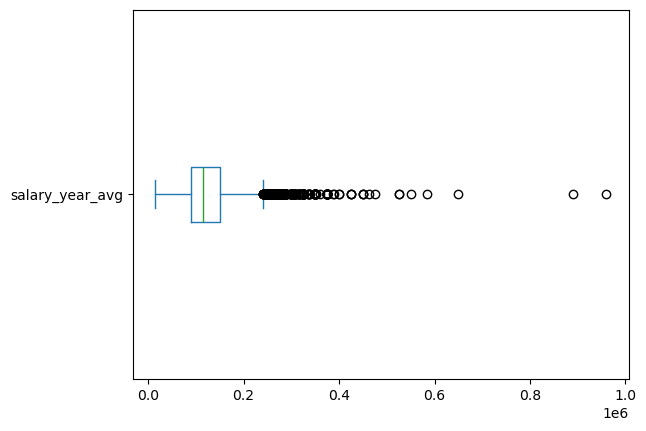

In [5]:
df['salary_year_avg'].plot(kind='box', vert= False)

/var/folders/9r/1gmqk2ns5496hsbhkqds2ldh0000gn/T/ipykernel_89133/1369601340.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = titles, vert = False)


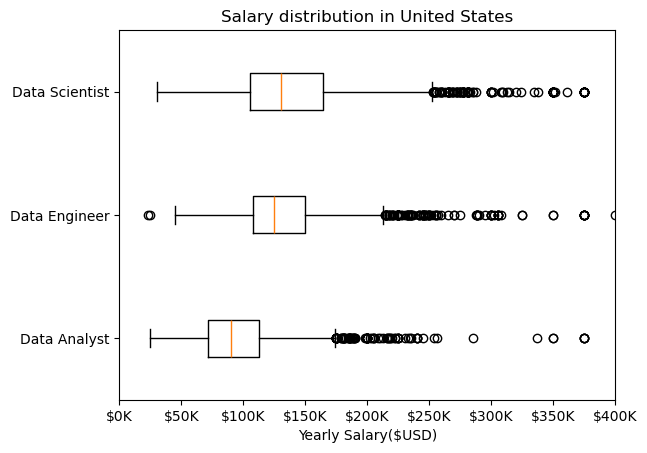

In [14]:
titles = [
    'Data Analyst', 
    'Data Engineer',
    'Data Scientist'
]
df_country_based = df[(df['job_title_short'].isin(titles)) & (df['job_country'] == job_country)].copy()
df_country_based.dropna(subset='salary_year_avg', inplace=True)

job_list = [df_country_based[df_country_based['job_title_short'] == title]['salary_year_avg'] for title in titles]

plt.boxplot(job_list, labels = titles, vert = False)
plt.title(f'Salary distribution in {job_country}')
plt.xlabel('Yearly Salary($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 400000)
plt.show()